In [47]:
import pandas as pd
import numpy as np
import pm4py
import random
from pm4py.algo.conformance.alignments import algorithm as alignments
from pm4py.algo.conformance.alignments import variants
from pm4py.objects.petri.importer import importer as pnml_importer

In [2]:
hh102 = pd.read_csv("hh102_activities_eventlog_v1.csv")

In [3]:
hh102

,concept:name,starttime,sensor,endtime,Translate01,Translate02,duration,daycase,time:timestamp
0,Sleep,2011-06-15 00:06:32,M021,2011-06-15 03:37:47,Bedroom,Bed,0 days 03:31:15,2011-6-15,2011-06-15 00:06:32
1,Bed_Toilet_Transition,2011-06-15 03:38:44,MA013,2011-06-15 03:41:22,Bathroom,Bathroom,0 days 00:02:38,2011-6-15,2011-06-15 03:38:44
2,Sleep,2011-06-15 03:44:50,M021,2011-06-15 08:45:56,Bedroom,Bed,0 days 05:01:06,2011-6-15,2011-06-15 03:44:50
3,Toilet,2011-06-15 08:46:36,MA013,2011-06-15 08:48:46,Bathroom,Bathroom,0 days 00:02:10,2011-6-15,2011-06-15 08:46:36
4,Morning_Meds,2011-06-15 08:48:50,MA013,2011-06-15 08:49:39,Bathroom,Bathroom,0 days 00:00:49,2011-6-15,2011-06-15 08:48:50
...,...,...,...,...,...,...,...,...,...
2890,Drink,2011-08-15 21:48:37,M007,2011-08-15 21:49:55,Kitchen,Kitchen,0 days 00:01:18,2011-8-15,2011-08-15 21:48:37
2891,Personal_Hygiene,2011-08-15 21:50:41,MA013,2011-08-15 21:50:49,Bathroom,Bathroom,0 days 00:00:08,2011-8-15,2011-08-15 21:50:41
2892,Dress,2011-08-15 21:50:51,MA020,2011-08-15 21:54:18,Bedroom,Bedroom,0 days 00:03:27,2011-8-15,2011-08-15 21:50:51
2893,Personal_Hygiene,2011-08-15 21:54:26,MA013,2011-08-15 22:23:51,Bathroom,Bathroom,0 days 00:29:25,2011-8-15,2011-08-15 21:54:26


In [4]:
hh102["daycase"].nunique()

58

In [5]:
daycase = list(hh102["daycase"].unique())

In [6]:
train_day = random.sample(daycase,15)

In [7]:
train_df = hh102.loc[hh102["daycase"].isin(train_day)]

In [11]:
train_df["daycase"].unique()

array(['2011-6-23', '2011-6-25', '2011-7-2', '2011-7-6', '2011-7-11',
       '2011-7-20', '2011-7-23', '2011-7-25', '2011-7-26', '2011-7-27',
       '2011-7-28', '2011-7-30', '2011-8-4', '2011-8-8', '2011-8-13'],
      dtype=object)

In [34]:
hh102_test = hh102.drop(columns=["Translate01","Translate02"],axis=1).reset_index(drop=True)
dataframe = pm4py.format_dataframe(hh102_test, case_id='daycase', activity_key='concept:name', timestamp_key='time:timestamp')
hh102_event_log_all = pm4py.convert_to_event_log(dataframe)
pm4py.write_xes(hh102_event_log_all, 'hh102_exported_all.xes')

In [20]:
train_df = train_df.drop(columns=["Translate01","Translate02"],axis=1).reset_index(drop=True)

In [21]:
dataframe = pm4py.format_dataframe(train_df, case_id='daycase', activity_key='concept:name', timestamp_key='time:timestamp')
hh102_event_log = pm4py.convert_to_event_log(dataframe)
# hh102_event = pm4py.convert_to_event_log(hh102, )

In [22]:
hh102_event_log[0][0]

{'concept:name': 'Sleep', 'starttime': '2011-06-23 00:00:00', 'sensor': 'M021', 'endtime': '2011-06-23 08:00:32', 'duration': '0 days 08:00:32', 'time:timestamp': Timestamp('2011-06-23 00:00:00'), '@@index': 0}

In [23]:
pm4py.write_xes(hh102_event_log, 'hh102_exported_15.xes')

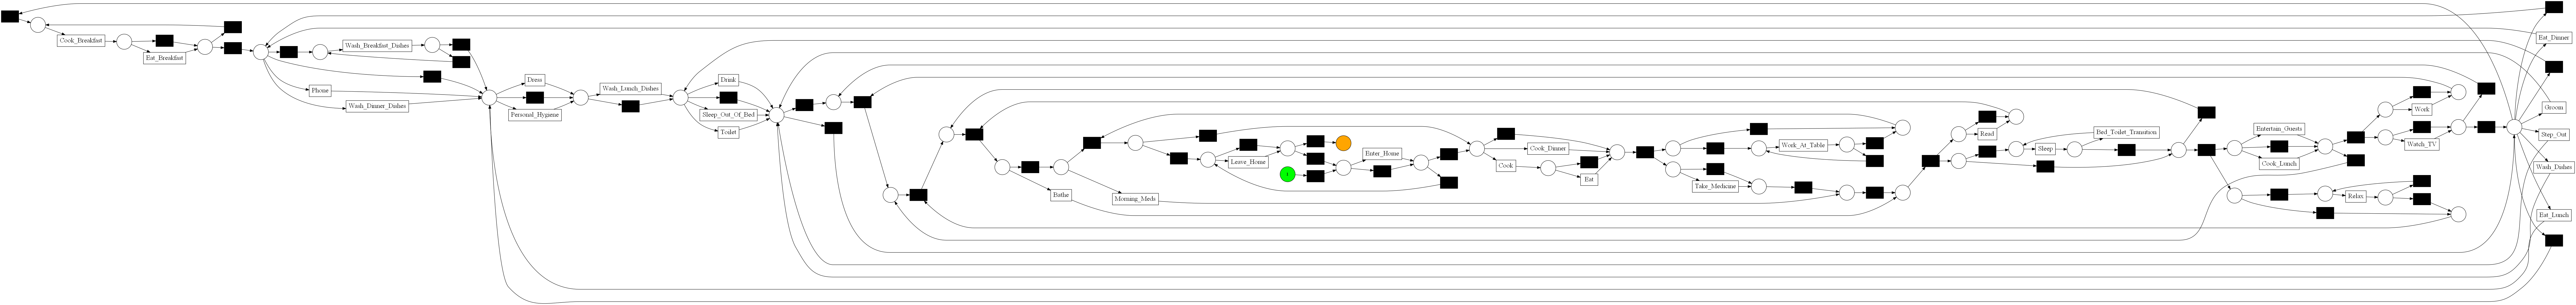

In [27]:
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(hh102_event_log)
pm4py.view_petri_net(net, initial_marking, final_marking)

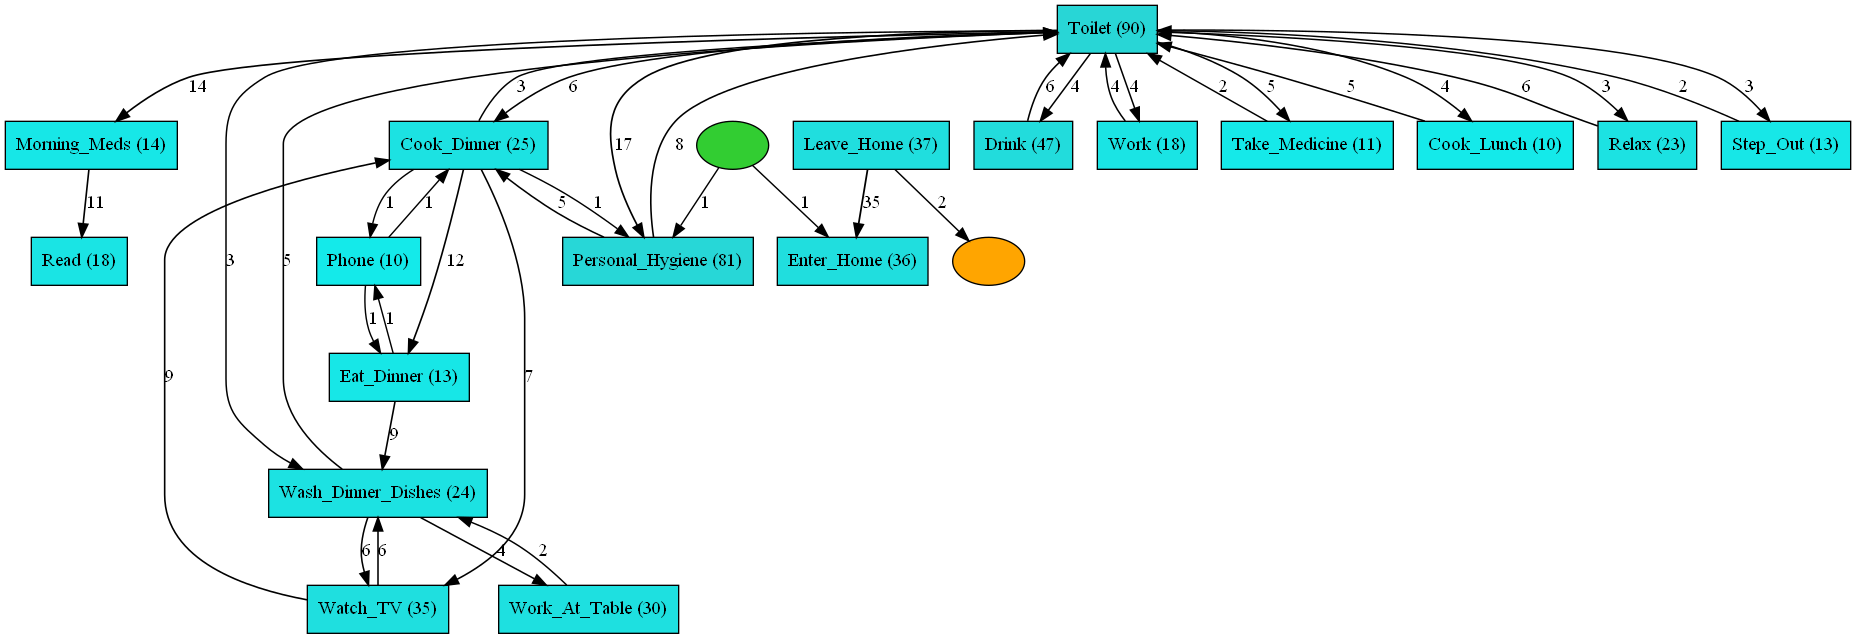

In [30]:
heu_net = pm4py.discover_heuristics_net(hh102_event_log, dependency_threshold=0.90)
pm4py.view_heuristics_net(heu_net)

In [28]:
len(net.transitions)

91

In [27]:
test_day = random.sample(daycase,10)
test_df = hh102.loc[hh102["daycase"].isin(test_day)]
dataframe = pm4py.format_dataframe(test_df, case_id='daycase', activity_key='concept:name', timestamp_key='time:timestamp')
hh102_test_event_log = pm4py.convert_to_event_log(dataframe)


In [35]:
align_result = alignments.apply(hh102_test_event_log, net, initial_marking, final_marking, variant=variants.state_equation_a_star)

In [40]:
align_result

[{'alignment': [('>>', None),
   ('>>', None),
   ('>>', None),
   ('>>', None),
   ('>>', None),
   ('>>', None),
   ('>>', None),
   ('>>', None),
   ('>>', None),
   ('>>', None),
   ('>>', None),
   ('Sleep', 'Sleep'),
   ('Bed_Toilet_Transition', 'Bed_Toilet_Transition'),
   ('Sleep', 'Sleep'),
   ('>>', None),
   ('>>', None),
   ('>>', None),
   ('>>', None),
   ('>>', None),
   ('>>', None),
   ('>>', None),
   ('>>', None),
   ('>>', None),
   ('Toilet', 'Toilet'),
   ('>>', None),
   ('>>', None),
   ('>>', None),
   ('>>', None),
   ('>>', None),
   ('Morning_Meds', 'Morning_Meds'),
   ('>>', None),
   ('>>', None),
   ('>>', None),
   ('>>', None),
   ('>>', None),
   ('>>', None),
   ('>>', None),
   ('>>', None),
   ('>>', None),
   ('>>', None),
   ('>>', None),
   ('>>', None),
   ('Dress', 'Dress'),
   ('>>', None),
   ('Read', 'Read'),
   ('Toilet', 'Toilet'),
   ('>>', None),
   ('>>', None),
   ('Cook_Breakfast', 'Cook_Breakfast'),
   ('Eat_Breakfast', 'Eat_Breakfas

In [36]:
for i in align_result:
    print(i["fitness"])

1
0.98
1
1
1
1
0.9824561403508771
1
1
1


In [48]:
net, im, fm = pnml_importer.apply("./process model/hh102_model_random_15.pnml")

In [49]:
prec = evaluator.apply(hh102_event_log, net, im, fm)
prec

0.03926330702286984

In [39]:
train_df["daycase"].unique()

array(['2011-6-21', '2011-6-22', '2011-6-24', '2011-7-2', '2011-7-5',
       '2011-7-7', '2011-7-8', '2011-7-11', '2011-7-14', '2011-7-16',
       '2011-7-17', '2011-7-28', '2011-8-5', '2011-8-7', '2011-8-14'],
      dtype=object)

In [38]:
test_df["daycase"].unique()

array(['2011-6-15', '2011-6-20', '2011-7-12', '2011-7-14', '2011-7-15',
       '2011-7-18', '2011-7-27', '2011-8-3', '2011-8-5', '2011-8-15'],
      dtype=object)

In [41]:
from pm4py.objects.petri.exporter import exporter as pnml_exporter

In [43]:
pnml_exporter.apply(net, initial_marking, "./process model/hh102_model_random_15_.pnml", final_marking=final_marking)

# Model discovered by Split miner

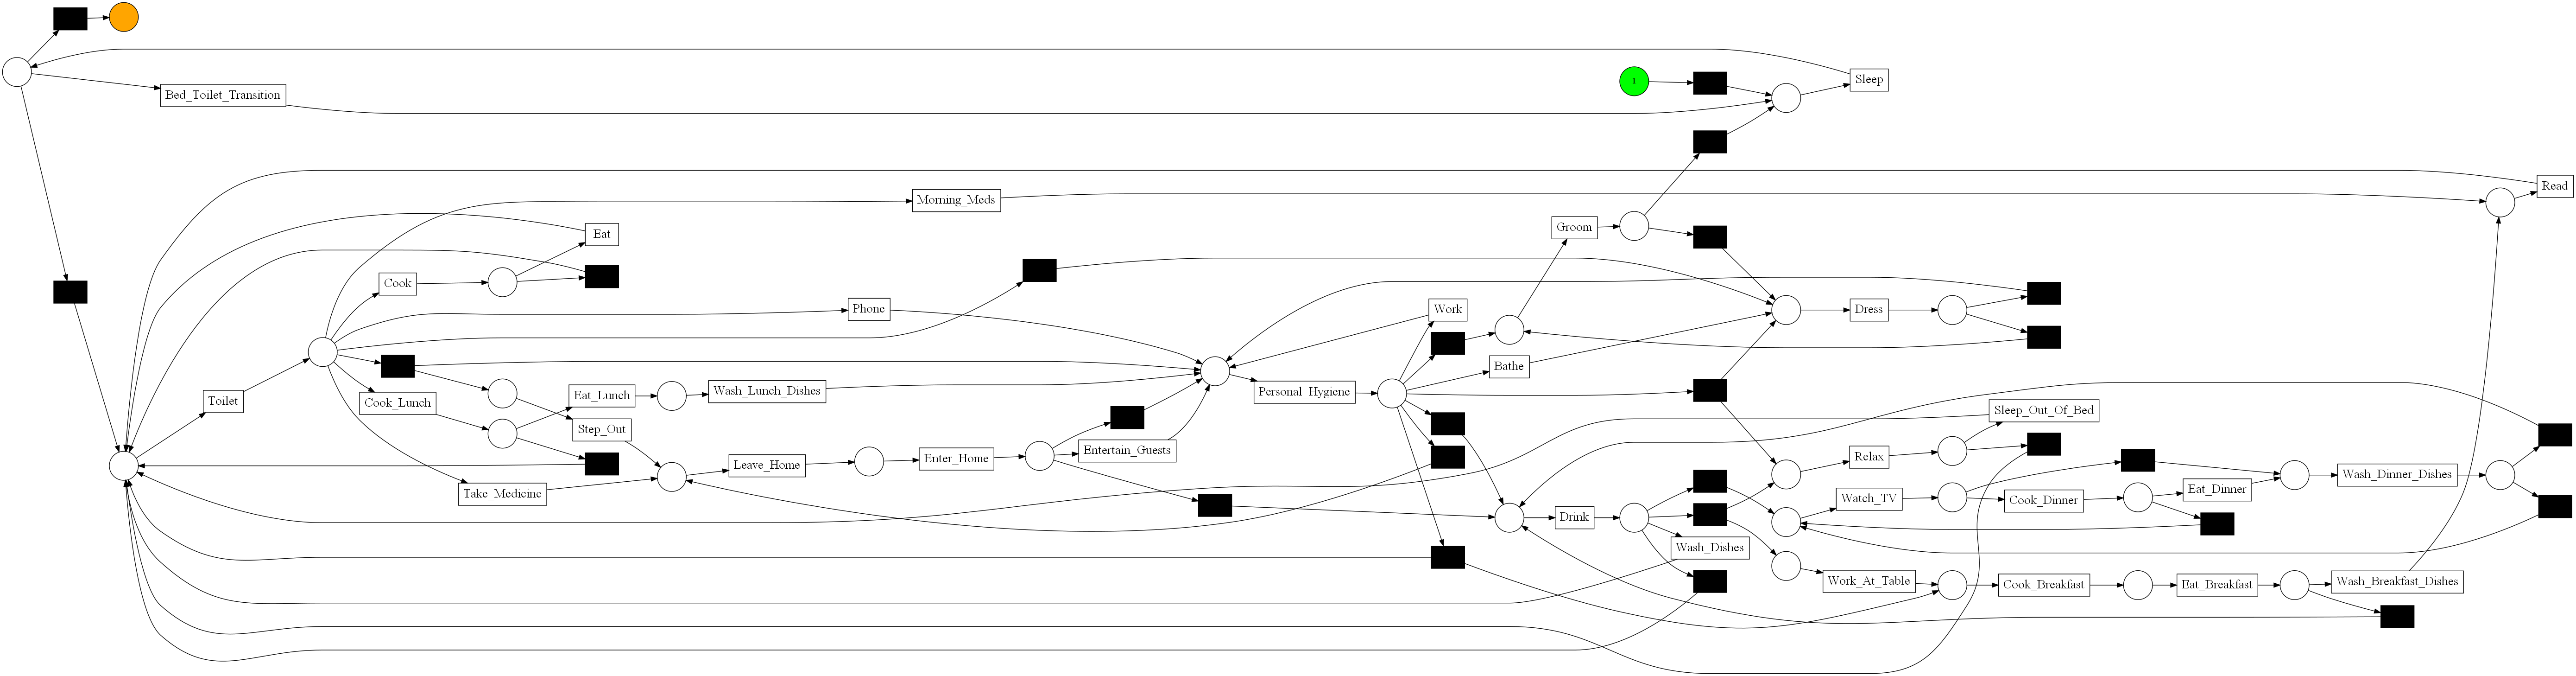

In [25]:
bpmn_graph = pm4py.read_bpmn("hh102_model.bpmn")
net, im, fm = pm4py.convert_to_petri_net(bpmn_graph)
pm4py.view_petri_net(net, im, fm)

In [26]:
len(net.transitions)

60

## other test sequences

In [28]:
align_result = alignments.apply(hh102_test_event_log, net, im, fm, variant=variants.state_equation_a_star)

In [30]:
for i in align_result:
    print(i["fitness"])

0.4339622641509434
0.4285714285714286
0.2894736842105263
0.4107142857142857
0.4482758620689655
0.47457627118644063
0.5087719298245614
0.5094339622641509
0.421875
0.5


## training sequences

In [31]:
align_result = alignments.apply(hh102_event_log, net, im, fm, variant=variants.state_equation_a_star)

In [32]:
for i in align_result:
    print(i["fitness"])

0.5476190476190477
0.4117647058823529
0.0
0.45945945945945943
0.44680851063829785
0.5925925925925926
0.537037037037037
0.6666666666666667
0.4482758620689655
0.47457627118644063
0.5344827586206897
0.5535714285714286
0.13636363636363635
0.5
0.0


## all sequences

In [35]:
align_result = alignments.apply(hh102_event_log_all, net, im, fm, variant=variants.state_equation_a_star)
for i in align_result:
    print(i["fitness"])

0.4339622641509434
0.4528301886792453
0.4693877551020408
0.4363636363636364
0.4067796610169492
0.37254901960784315
0.5365853658536586
0.5471698113207547
0.5476190476190477
0.5319148936170213
0.4117647058823529
0.4651162790697675
0.4225352112676056
0.43333333333333335
0.5098039215686274
0.47916666666666663
0.42000000000000004
0.4375
0.0
0.33333333333333337
0.40740740740740744
0.4285714285714286
0.2894736842105263
0.42028985507246375
0.5087719298245614
0.5178571428571428
0.4782608695652174
0.45945945945945943
0.44680851063829785
0.4354838709677419
0.55
0.5925925925925926
0.4107142857142857
0.537037037037037
0.6666666666666667
0.4482758620689655
0.47457627118644063
0.42622950819672134
0.47457627118644063
0.5344827586206897
0.4883720930232558
0.5087719298245614
0.43103448275862066
0.5535714285714286
0.4776119402985075
0.525
0.4098360655737705
0.4032258064516129
0.13636363636363635
0.5352112676056338
0.4655172413793104
0.5094339622641509
0.421875
0.5
0.42647058823529416
0.4655172413793104
0

In [39]:
from pm4py.evaluation.precision import evaluator


In [44]:
prec = evaluator.apply(hh102_event_log_all, net, im, fm)
prec

0.4962025316455696